In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/ef8d972e-d971-48d4-85b0-ca34297e6f3e.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_self_service_25_1697102647_2c6e43da_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/mackintosh_philosophy_dress_1697107181_db88f460_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_preloved_1697093176_9e6c7446_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_broken_white_1697080948_214d020a_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_preloved_1697087061_33470d8b_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_kaftan_gamis_longdress_1697101483_33485774_progressive_thumbnail.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dd262e49-9475-442f-aa1a-7eb21747ca24.jpg
/kaggle/input/clothes-dataset/Clothes_Dataset/Gaun/dress_preloved_1697096936_67aa608d_progressive_thumbnai

In [27]:
%pip install ResNet

Note: you may need to restart the kernel to use updated packages.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
print("done")

done


In [29]:
# defining hyperparameters
BATCH_SIZE = 64
NUM_EPOCHS = 5
NUM_CLASSES = 15
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("done")

done


In [30]:
# data transforms --> makes data useable
# also does some augmentation so model learns intricacies

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5)
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
print("done")

done


In [31]:
#load data
dataset = datasets.ImageFolder("/kaggle/input/clothes-dataset", transform=train_transforms)

print("done")

done


In [32]:
# test train split...
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#data transforms
val_dataset.dataset.transform = val_transforms

#load data using dataloader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print ("done")

done


In [33]:
# model and optimzer etc 

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

print("done")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done


In [34]:
# training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_loss = running_loss / total
    train_acc = correct / total
    
    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()
    
    val_acc = val_correct / val_total
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] "
          f"Train Loss: {train_loss:.4f} "
          f"Train Acc: {train_acc:.4f} "
          f"Val Acc: {val_acc:.4f}")

Epoch [1/5] Train Loss: 0.0957 Train Acc: 0.9765 Val Acc: 1.0000
Epoch [2/5] Train Loss: 0.0000 Train Acc: 1.0000 Val Acc: 1.0000
Epoch [3/5] Train Loss: 0.0000 Train Acc: 1.0000 Val Acc: 1.0000
Epoch [4/5] Train Loss: 0.0000 Train Acc: 1.0000 Val Acc: 1.0000
Epoch [5/5] Train Loss: 0.0000 Train Acc: 1.0000 Val Acc: 1.0000


In [40]:

print(len(train_dataset))

print(len(val_dataset))


6000
1500


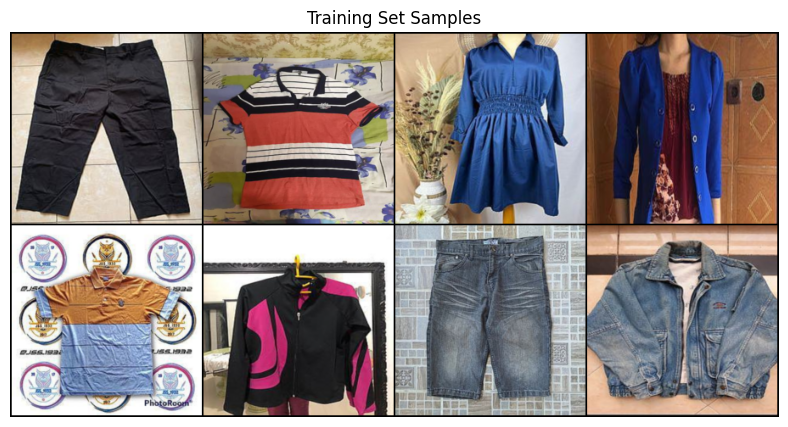

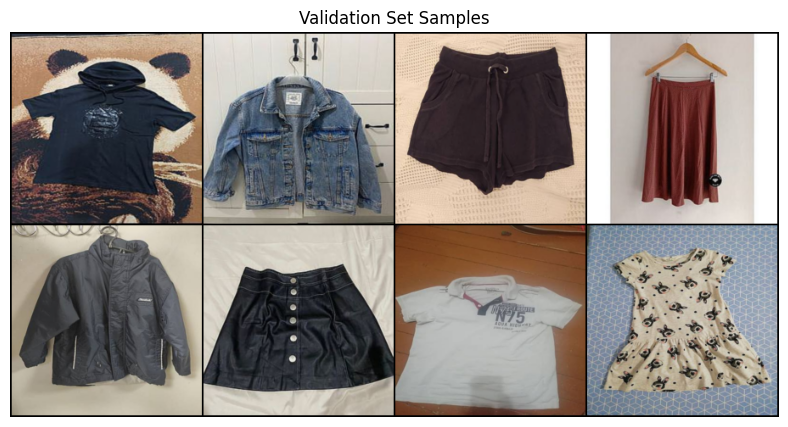

In [41]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Function to show a batch of images
def show_images(dataloader, title, num_images=8):
    images, labels = next(iter(dataloader))
    images = images[:num_images]
    labels = labels[:num_images]

    # Undo normalization (if you used ImageNet normalization)
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    images = images * std[None, :, None, None] + mean[None, :, None, None]
    images = torch.clamp(images, 0, 1)

    # Make a grid of images
    grid = torchvision.utils.make_grid(images, nrow=4)
    grid = np.transpose(grid.numpy(), (1, 2, 0))

    plt.figure(figsize=(10, 5))
    plt.imshow(grid)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Example usage
show_images(train_loader, "Training Set Samples")
show_images(val_loader, "Validation Set Samples")


In [37]:
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as transforms
import torch

print("done")

done


In [38]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
print("done")

done


In [53]:

img = Image.open("/kaggle/input/jeanssss/jeans.jpg").convert("RGB")

print()

u


In [60]:
# Example check
from torchvision import datasets

dataset = datasets.ImageFolder("/kaggle/input/clothes-dataset/Clothes_Dataset")
print(dataset.classes)

classNames1 = dataset.classes

print(classNames1)

['Blazer', 'Celana_Panjang', 'Celana_Pendek', 'Gaun', 'Hoodie', 'Jaket', 'Jaket_Denim', 'Jaket_Olahraga', 'Jeans', 'Kaos', 'Kemeja', 'Mantel', 'Polo', 'Rok', 'Sweter']
['Blazer', 'Celana_Panjang', 'Celana_Pendek', 'Gaun', 'Hoodie', 'Jaket', 'Jaket_Denim', 'Jaket_Olahraga', 'Jeans', 'Kaos', 'Kemeja', 'Mantel', 'Polo', 'Rok', 'Sweter']


In [65]:
classNames = [
    "Blazer",
    "Long Pants / Trousers",   # Celana_Panjang
    "Shorts",                   # Celana_Pendek
    "Dress",                    # Gaun
    "Hoodie",
    "Jacket",                   # Jaket
    "Denim Jacket",             # Jaket_Denim
    "Sports Jacket / Track Jacket",  # Jaket_Olahraga
    "Jeans",
    "T-Shirt",                  # Kaos
    "Shirt (Dress Shirt / Button-Up)", # Kemeja
    "Coat",                     # Mantel
    "Polo Shirt",               # Polo
    "Skirt",                    # Rok
    "Sweater"                   # Sweter
]



In [63]:
# Preprocess
input_tensor = transform(img).unsqueeze(0).to(DEVICE)  # Add batch dimension

# Predict
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, pred = torch.max(output, 1)


# Show result
print(f"Predicted class: {classNames1[pred.item()]}")

Predicted class: Blazer
